# TerraAgent - Verify Science Logic

This notebook verifies that the mock science files produce valid plots without errors.

We test:
1. `science_climate.py` - Climate change simulation
2. `science_fire.py` - Fire Weather Index calculation
3. `science_flood.py` - Monte Carlo flood loss assessment

In [1]:
# Setup: Add src directory to path
import sys
import os

# Add the src directory to the path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

print(f"Added to path: {src_path}")

# Enable inline plotting
%matplotlib inline
import matplotlib.pyplot as plt

Added to path: c:\Users\hchen117\OneDrive - University of Iowa\Documents\GitHub\TerraAgent\src


## 1. Climate Change Simulation

Test `simulate_warming()` with year 2050 and "High" emission scenario.

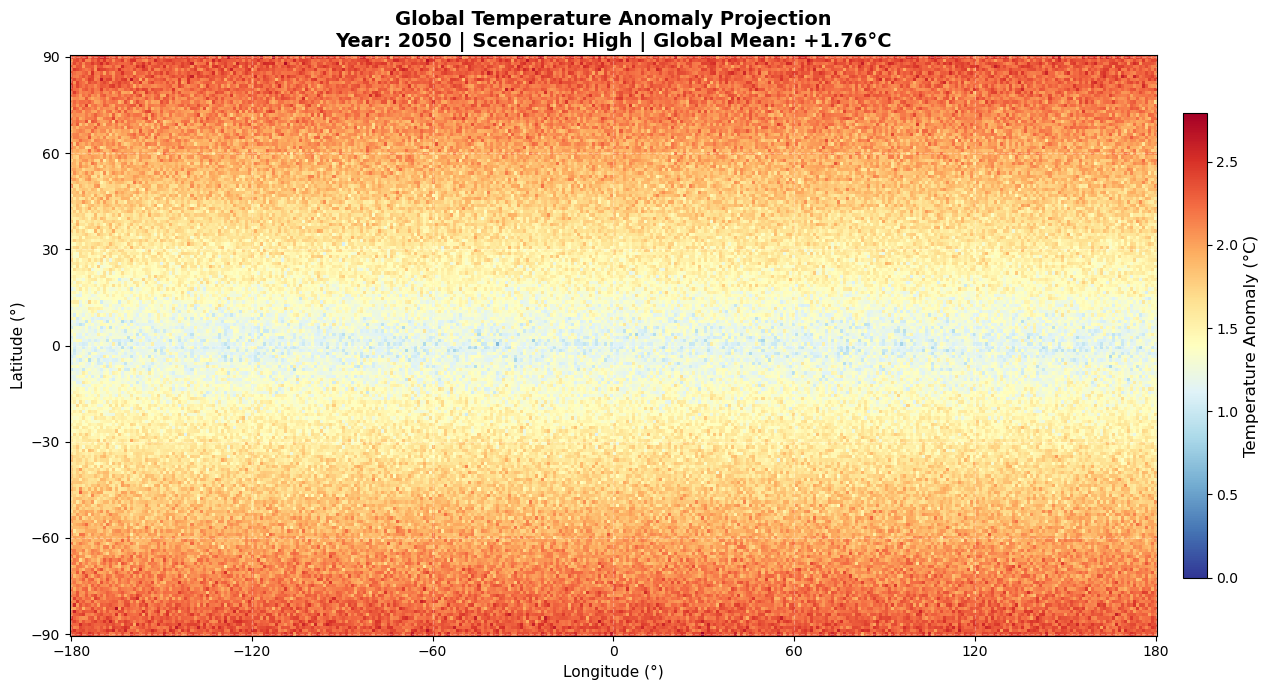

✅ Climate simulation completed successfully!


In [2]:
from science_climate import simulate_warming

# Run simulation with High emission scenario for 2050
fig = simulate_warming(2050, "High")
plt.show()

print("✅ Climate simulation completed successfully!")

✅ All climate scenarios tested successfully!


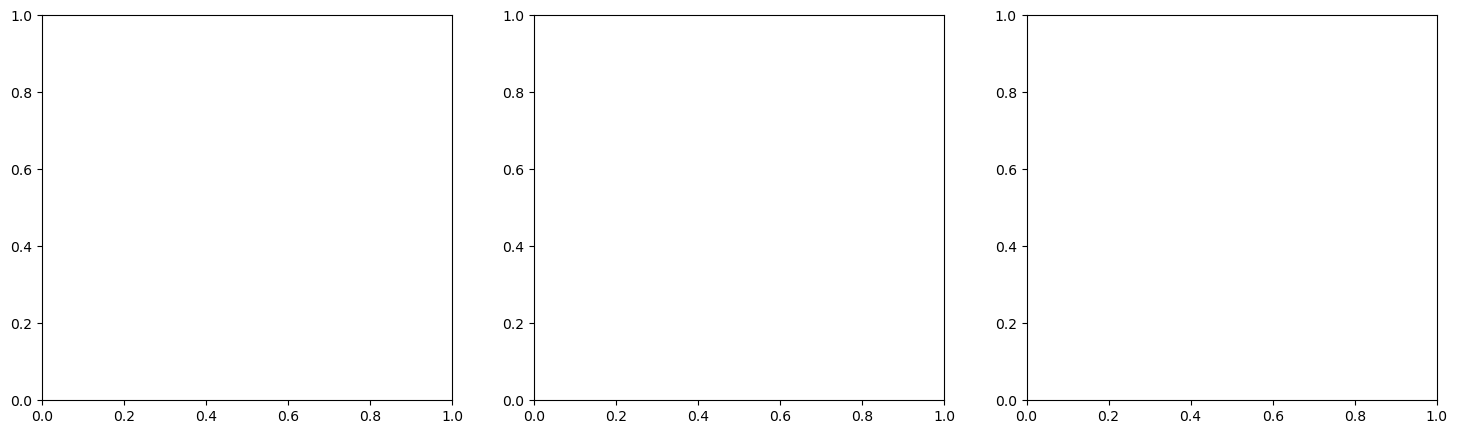

In [3]:
# Test different scenarios
scenarios = ["Low", "Medium", "High"]
years = [2030, 2050, 2100]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (year, scenario) in enumerate(zip(years, scenarios)):
    result_fig = simulate_warming(year, scenario)
    plt.close(result_fig)  # Close to prevent double display
    
print("✅ All climate scenarios tested successfully!")

## 2. Fire Weather Index Calculation

Test `calculate_fwi_risk()` with various meteorological inputs to check sensitivity.

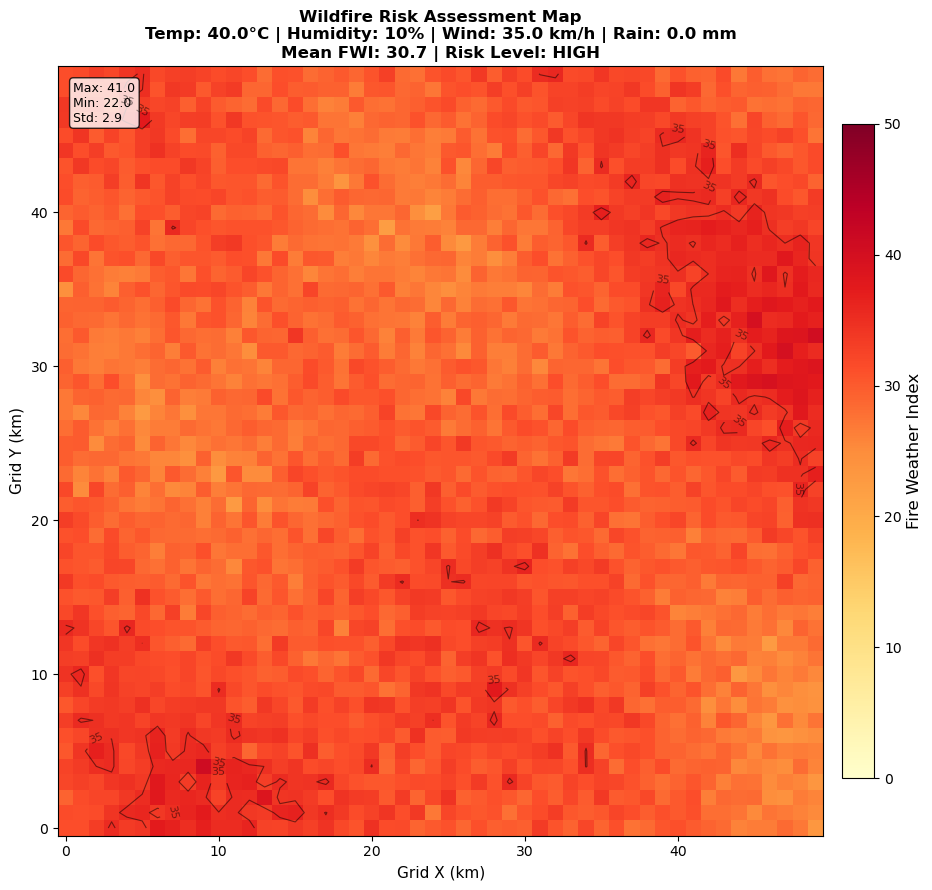

✅ High risk fire scenario completed!


In [4]:
from science_fire import calculate_fwi_risk

# Test with hot, dry, windy conditions (high risk)
fig_high = calculate_fwi_risk(
    temperature=40.0,   # Hot
    humidity=10,        # Very dry
    wind_speed=35.0,    # Strong wind
    rain_mm=0.0         # No rain
)
plt.show()

print("✅ High risk fire scenario completed!")

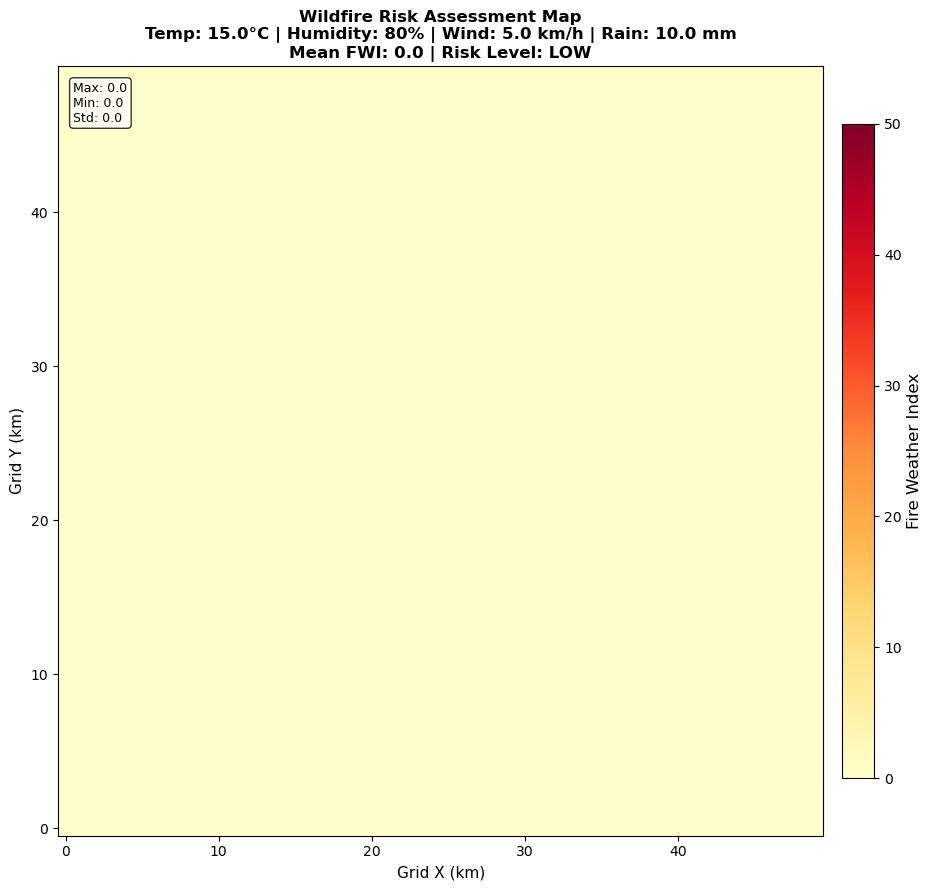

✅ Low risk fire scenario completed!


In [5]:
# Test with cool, humid, calm conditions (low risk)
fig_low = calculate_fwi_risk(
    temperature=15.0,   # Cool
    humidity=80,        # Humid
    wind_speed=5.0,     # Light wind
    rain_mm=10.0        # Recent rain
)
plt.show()

print("✅ Low risk fire scenario completed!")

In [6]:
# Sensitivity test: vary temperature
temps = [20, 30, 40]
print("Testing temperature sensitivity...")

for temp in temps:
    fig = calculate_fwi_risk(temp, 30, 20.0, 0.0)
    plt.close(fig)
    
print("✅ Temperature sensitivity test passed!")

Testing temperature sensitivity...
✅ Temperature sensitivity test passed!


## 3. Flood Loss Monte Carlo Simulation

Test `calculate_loss_uncertainty()` and verify the histogram distribution.

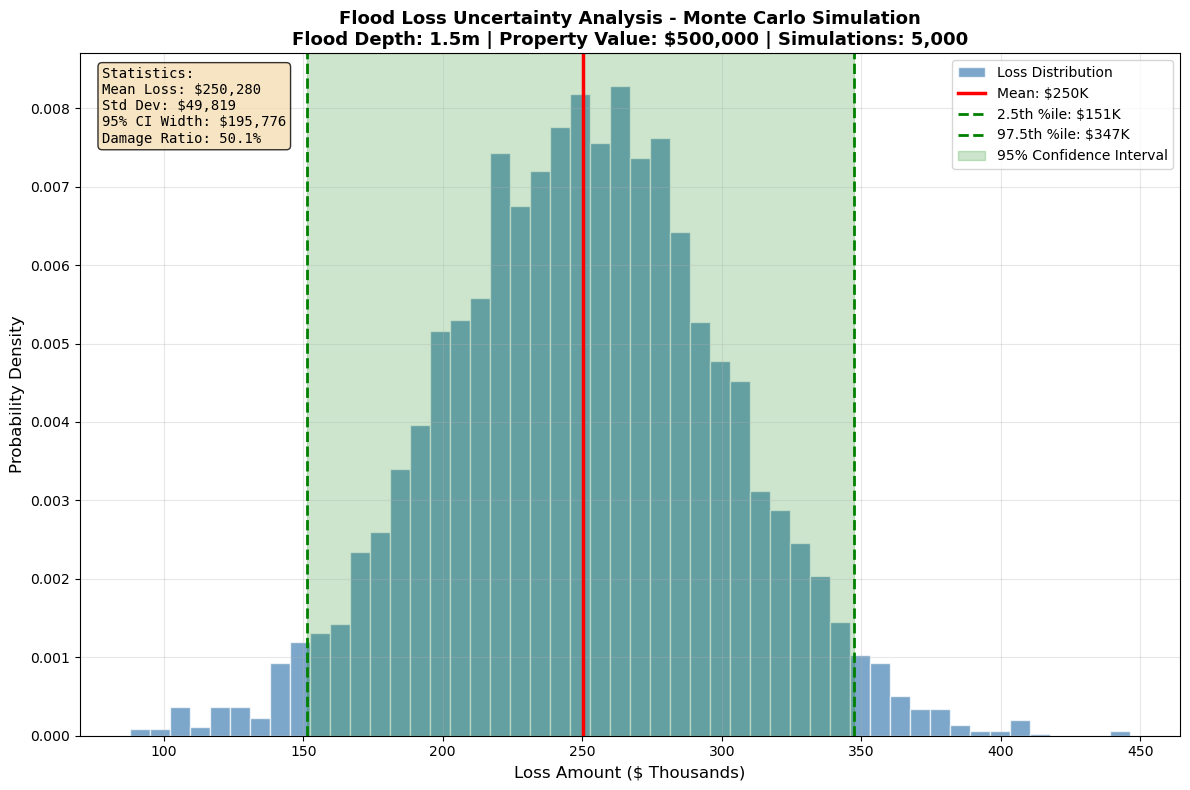

✅ Flood Monte Carlo simulation completed!


In [7]:
from science_flood import calculate_loss_uncertainty

# Run Monte Carlo simulation
fig = calculate_loss_uncertainty(
    flood_depth=1.5,      # 1.5 meters
    property_value=500000, # $500,000
    num_simulations=5000
)
plt.show()

print("✅ Flood Monte Carlo simulation completed!")

In [8]:
# Test with different flood depths
import numpy as np

depths = [0.5, 1.0, 2.0, 3.0]
property_value = 400000

print("Testing different flood depths...")
for depth in depths:
    fig = calculate_loss_uncertainty(depth, property_value, 1000)
    plt.close(fig)
    print(f"  Depth {depth}m: OK")

print("\n✅ All flood depth scenarios tested!")

Testing different flood depths...
  Depth 0.5m: OK
  Depth 1.0m: OK
  Depth 2.0m: OK
  Depth 3.0m: OK

✅ All flood depth scenarios tested!


In [9]:
# Verify distribution shape (should be roughly Gaussian)
import numpy as np

np.random.seed(42)
losses = []
num_simulations = 5000

# Replicate the Monte Carlo logic to verify
flood_depth = 1.5
property_value = 500000
k, d0 = 2.0, 1.5

for _ in range(num_simulations):
    base_damage = 1.0 / (1.0 + np.exp(-k * (flood_depth - d0)))
    noise = np.random.normal(0, 0.1)
    damage_ratio = np.clip(base_damage + noise, 0, 1)
    losses.append(property_value * damage_ratio)

losses = np.array(losses)

print(f"Distribution Statistics:")
print(f"  Mean: ${np.mean(losses):,.0f}")
print(f"  Std Dev: ${np.std(losses):,.0f}")
print(f"  Skewness: {np.mean(((losses - np.mean(losses)) / np.std(losses))**3):.3f}")
print(f"  (Values near 0 indicate Gaussian-like distribution)")
print("\n✅ Distribution shape verified!")

Distribution Statistics:
  Mean: $250,280
  Std Dev: $49,819
  Skewness: -0.012
  (Values near 0 indicate Gaussian-like distribution)

✅ Distribution shape verified!


## Summary

All three science modules have been verified:

| Module | Function | Status |
|--------|----------|--------|
| science_climate.py | `simulate_warming()` | ✅ Passed |
| science_fire.py | `calculate_fwi_risk()` | ✅ Passed |
| science_flood.py | `calculate_loss_uncertainty()` | ✅ Passed |